## Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libreria para grafico de correlaciones
from scipy import stats

## Liberias para ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 



In [2]:
#Carga de Datos
df = pd.read_csv('Data Nueva.csv',sep=',', skiprows=1, names=['N_Caso', 
                                                              'Cu', 
                                                              'Zr', 
                                                              'NAtomos', 
                                                              'Lx', 
                                                              'Ly', 
                                                              'Lz', 
                                                              'Crate', 
                                                              'T', 
                                                              'UTS', 
                                                              'Flow_Stress',
                                                              'E',
                                                              'Yield_strength',
                                                              'Resilence',
                                                              'Toughness',
                                                              'Poissonratio',
                                                              'Coord_1st',
                                                              'Coord_2nd',
                                                              'W_mean'
                                                              
                                                             ])
df.head(10)


,N_Caso,Cu,Zr,NAtomos,Lx,Ly,Lz,Crate,T,UTS,Flow_Stress,E,Yield_strength,Resilence,Toughness,Poissonratio,Coord_1st,Coord_2nd,W_mean
0,1,43,57,16640,207.36,84.24,16.20,80000000000,250,1.99582,1.22679,50.26332,1.45366,0.02395,0.27239,0.41306,12.49,55.26,0.543
1,2,47,53,23400,162.00,84.24,29.16,40000000000,110,2.49807,1.53889,58.09865,1.76514,0.03002,0.34095,0.39564,12.63,56.77,0.557
2,3,54,46,58240,259.20,84.24,45.36,40000000000,110,2.63827,1.57795,59.65716,1.89148,0.03345,0.35723,0.41261,12.82,58.77,0.574
3,4,38,62,25168,168.48,71.28,35.64,10000000000,170,2.43189,1.34140,55.01061,1.66102,0.02778,0.31127,0.42505,12.40,54.15,0.546
4,5,54,46,36816,191.16,84.24,38.88,20000000000,150,2.65556,1.49051,59.33614,1.82001,0.03152,0.34736,0.40290,12.81,58.73,0.573
5,6,52,48,14740,217.08,71.28,16.20,10000000000,170,2.80341,1.58372,59.75726,1.59272,0.02301,0.35097,0.43157,12.76,58.08,0.571
6,7,60,40,72000,259.20,97.20,48.60,40000000000,290,2.30325,1.37800,55.95710,1.69022,0.02846,0.30900,0.40681,12.95,60.25,0.595
7,8,59,41,40950,204.12,81.00,42.12,10000000000,90,2.97929,1.79900,64.05474,1.93567,0.03276,0.40321,0.41169,12.96,60.32,0.606
8,9,46,54,34506,230.04,87.48,29.16,10000000000,290,2.43559,1.24464,55.16864,1.54916,0.02450,0.29645,0.38807,12.56,56.17,0.548
9,10,49,51,32500,210.60,81.00,32.40,20000000000,150,2.64200,1.42221,57.19410,1.84481,0.03362,0.33676,0.42639,12.69,57.25,0.560


In [3]:
df.describe()

,N_Caso,Cu,Zr,NAtomos,Lx,Ly,Lz,Crate,T,UTS,Flow_Stress,E,Yield_strength,Resilence,Toughness,Poissonratio,Coord_1st,Coord_2nd,W_mean
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,50.380000,49.620000,33290.880000,209.757600,83.494800,32.302800,4.970000e+10,180.60000,2.509578,1.479035,56.990014,1.743983,0.030052,0.331637,0.403558,12.707600,57.647600,0.570230
std,29.011492,8.671071,8.671071,13230.958441,31.800853,10.035128,10.824077,3.588576e+10,74.20719,0.299085,0.193572,3.948043,0.185178,0.004697,0.040058,0.021947,0.231792,2.527193,0.026515
min,1.000000,36.000000,35.000000,12880.000000,162.000000,64.800000,16.200000,1.000000e+10,50.00000,1.889210,1.100760,47.284650,1.286730,0.018090,0.251140,0.332330,12.290000,53.400000,0.541000
25%,25.750000,42.750000,42.000000,22333.500000,181.440000,74.520000,22.680000,1.750000e+10,130.00000,2.301545,1.328455,54.886957,1.628383,0.027678,0.308717,0.391663,12.490000,55.345000,0.549000
50%,50.500000,49.500000,50.500000,31460.000000,208.980000,84.240000,32.400000,4.000000e+10,180.00000,2.486760,1.475490,56.827330,1.740305,0.030480,0.328075,0.402875,12.695000,57.530000,0.561500
75%,75.250000,58.000000,57.250000,40657.500000,236.520000,93.960000,42.120000,8.000000e+10,235.00000,2.718075,1.588510,59.477130,1.856725,0.033243,0.357765,0.416380,12.892500,59.745000,0.584000
max,100.000000,65.000000,64.000000,72000.000000,259.200000,97.200000,48.600000,1.000000e+11,290.00000,3.307720,2.085280,67.854810,2.227580,0.040570,0.443040,0.459370,13.130000,62.240000,0.643000


In [4]:
#Creo una copia de seguridad y borro indice.
Data = df
Data = Data.drop(columns=['N_Caso'])
Data.head()

,Cu,Zr,NAtomos,Lx,Ly,Lz,Crate,T,UTS,Flow_Stress,E,Yield_strength,Resilence,Toughness,Poissonratio,Coord_1st,Coord_2nd,W_mean
0,43,57,16640,207.36,84.24,16.20,80000000000,250,1.99582,1.22679,50.26332,1.45366,0.02395,0.27239,0.41306,12.49,55.26,0.543
1,47,53,23400,162.00,84.24,29.16,40000000000,110,2.49807,1.53889,58.09865,1.76514,0.03002,0.34095,0.39564,12.63,56.77,0.557
2,54,46,58240,259.20,84.24,45.36,40000000000,110,2.63827,1.57795,59.65716,1.89148,0.03345,0.35723,0.41261,12.82,58.77,0.574
3,38,62,25168,168.48,71.28,35.64,10000000000,170,2.43189,1.34140,55.01061,1.66102,0.02778,0.31127,0.42505,12.40,54.15,0.546
4,54,46,36816,191.16,84.24,38.88,20000000000,150,2.65556,1.49051,59.33614,1.82001,0.03152,0.34736,0.40290,12.81,58.73,0.573


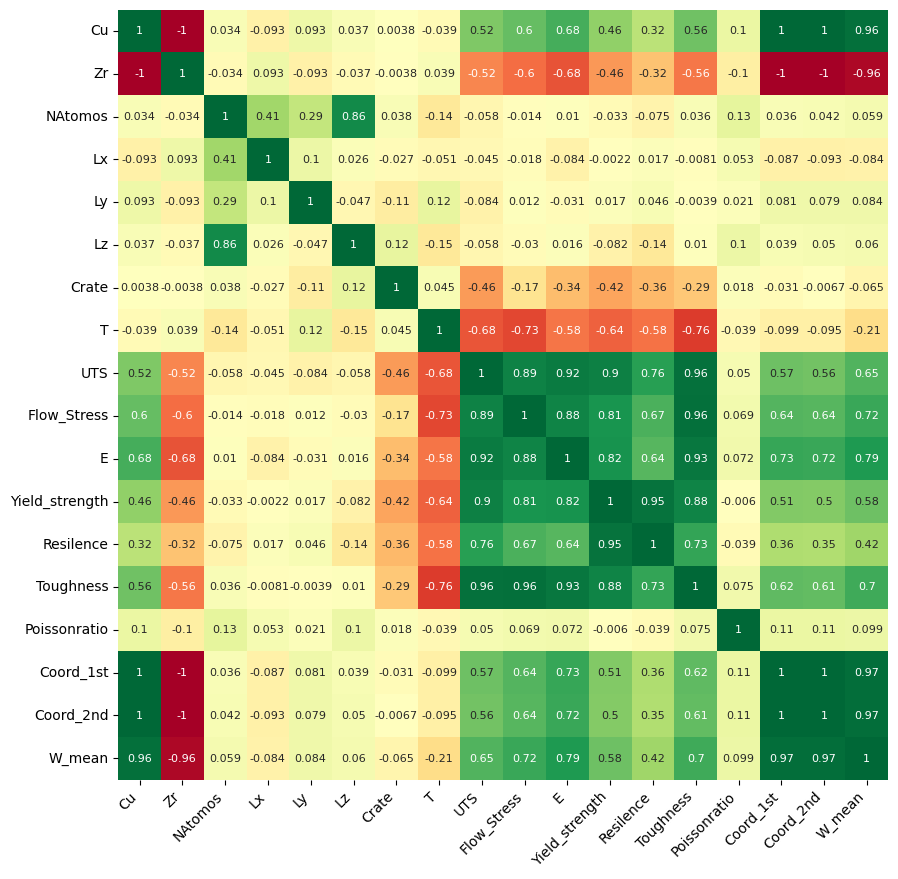

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(
    Data.corr(method='spearman'),
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = "RdYlGn",
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

Correlaciones a destacar:

- I) CU y Zr tienen una clara correlación, dado que se refiere al contenido porcentual de cada material, en consecuencia son explicativas entre si.

- II) CU y (UTS,Flow_Stress,E,Toughness,coord1st , coird2nd, W-Mean) con 0.52 0.6 0.68 0.56 respectivamente.

- III) ZR y (UTS,Flow_Stress,E,Toughness) Poseen los mismos valores de correlación pero de manera negativa. 
 
- IV) El Número de atomo tiene una fuerte correlación positiva con Lz.

- V) Las magnitudes (Lx, Ly Lz) tiene correlación con el numero de átomos.

- VI) LAs variables entre  (Crate y Toughness) en el eje Y formar un cuadro de correlaciones consiuderable entre UTS y Toughness en el eje X.


- VII) Las nuevas variables de los promedios, se ven altamente correlacionados entre si, y con el cuadrado mencionado anteriormente).



### DataFrame con variables de interés

In [6]:
list(Data)

['Cu',
 'Zr',
 'NAtomos',
 'Lx',
 'Ly',
 'Lz',
 'Crate',
 'T',
 'UTS',
 'Flow_Stress',
 'E',
 'Yield_strength',
 'Resilence',
 'Toughness',
 'Poissonratio',
 'Coord_1st',
 'Coord_2nd',
 'W_mean']

In [7]:
df = Data[['Cu',
         'Zr',
         'T',
         'E',
         'Yield_strength',
         'Resilence',
         'Coord_1st',
         'W_mean',
         'UTS',
         'Flow_Stress',
         'Toughness',
             ]]

df

,Cu,Zr,T,E,Yield_strength,Resilence,Coord_1st,W_mean,UTS,Flow_Stress,Toughness
0,43,57,250,50.26332,1.45366,0.02395,12.49,0.543,1.99582,1.22679,0.27239
1,47,53,110,58.09865,1.76514,0.03002,12.63,0.557,2.49807,1.53889,0.34095
2,54,46,110,59.65716,1.89148,0.03345,12.82,0.574,2.63827,1.57795,0.35723
3,38,62,170,55.01061,1.66102,0.02778,12.40,0.546,2.43189,1.34140,0.31127
4,54,46,150,59.33614,1.82001,0.03152,12.81,0.573,2.65556,1.49051,0.34736
...,...,...,...,...,...,...,...,...,...,...,...
95,58,42,290,56.31742,1.34895,0.01809,12.88,0.580,2.21907,1.33615,0.29937
96,64,36,130,60.45558,1.98354,0.03704,13.07,0.615,2.86866,1.75045,0.37378
97,63,37,250,56.90290,1.60598,0.02508,13.04,0.604,2.37488,1.48328,0.32383
98,38,62,130,54.26254,1.80562,0.03342,12.41,0.546,2.39711,1.32283,0.31112


In [8]:
list(df)

['Cu',
 'Zr',
 'T',
 'E',
 'Yield_strength',
 'Resilence',
 'Coord_1st',
 'W_mean',
 'UTS',
 'Flow_Stress',
 'Toughness']

### Particionado del conjunto de datos

In [9]:
train_set, test_set = train_test_split(df,test_size = 0.3, random_state= 42,shuffle=False)

### Escalado, Normalizacion y estandar

#### Min Max (Train Set)

In [10]:
from sklearn.preprocessing import MinMaxScaler

#Atributos para Train
minmax_scale_attrs = train_set[['Cu',
 'Zr',
 'T',
 'E',
 'Yield_strength',
 'Resilence',
 'Coord_1st',
 'W_mean',
 'UTS',
 'Flow_Stress',
 'Toughness']]



#Atributos para Test
minmax_scale_attrs2 = test_set[['Cu',
 'Zr',
 'T',
 'E',
 'Yield_strength',
 'Resilence',
 'Coord_1st',
 'W_mean',
 'UTS',
 'Flow_Stress',
 'Toughness']]

#Uso de la función
minmax_scaled = MinMaxScaler()

#Generando Df para el Train Set
X_minmax_Train = minmax_scaled.fit_transform(minmax_scale_attrs)
X_minmax_Train = pd.DataFrame(X_minmax_Train, columns=['Cu',
 'Zr',
 'T',
 'E',
 'Yield_strength',
 'Resilence',
 'Coord_1st',
 'W_mean',
 'UTS',
 'Flow_Stress',
 'Toughness'])

#Generando Df para el Test Set
X_minmax_Test = minmax_scaled.transform(minmax_scale_attrs2)
X_minmax_Test = pd.DataFrame(X_minmax_Test, columns=['Cu',
 'Zr',
 'T',
 'E',
 'Yield_strength',
 'Resilence',
 'Coord_1st',
 'W_mean',
 'UTS',
 'Flow_Stress',
 'Toughness'])





#### Normalizacion

In [11]:
from sklearn.preprocessing import Normalizer

#Atributos para Train
scaler_attrs = train_set[['Cu',
 'Zr',
 'T',
 'E',
 'Yield_strength',
 'Resilence',
 'Coord_1st',
 'W_mean',
 'UTS',
 'Flow_Stress',
 'Toughness']]



#Atributos para Test
scaler_attrs2 = test_set[['Cu',
 'Zr',
 'T',
 'E',
 'Yield_strength',
 'Resilence',
 'Coord_1st',
 'W_mean',
 'UTS',
 'Flow_Stress',
 'Toughness']]

#Uso de la función
scaler = Normalizer()

#Generando Df para el Train Set
X_Normalizer_Train = scaler.fit_transform(scaler_attrs)
X_Normalizer_Train = pd.DataFrame(X_Normalizer_Train, columns=['Cu',
 'Zr',
 'T',
 'E',
 'Yield_strength',
 'Resilence',
 'Coord_1st',
 'W_mean',
 'UTS',
 'Flow_Stress',
 'Toughness'])

#Generando Df para el Test Set
X_Normalizer_Test = scaler.transform(scaler_attrs2)
X_Normalizer_Test = pd.DataFrame(X_Normalizer_Test, columns=['Cu',
 'Zr',
 'T',
 'E',
 'Yield_strength',
 'Resilence',
 'Coord_1st',
 'W_mean',
 'UTS',
 'Flow_Stress',
 'Toughness'])





#### Standar (Z-score normalization)

In [12]:
from sklearn.preprocessing import StandardScaler

#Atributos para Train
StandarScaler_attr = train_set[['Cu',
 'Zr',
 'T',
 'E',
 'Yield_strength',
 'Resilence',
 'Coord_1st',
 'W_mean',
 'UTS',
 'Flow_Stress',
 'Toughness']]



#Atributos para Test
StandarScaler_attr2 = test_set[['Cu',
 'Zr',
 'T',
 'E',
 'Yield_strength',
 'Resilence',
 'Coord_1st',
 'W_mean',
 'UTS',
 'Flow_Stress',
 'Toughness']]

#Uso de la función
Standar = StandardScaler()

#Generando Df para el Train Set
X_Standar_Train = Standar.fit_transform(StandarScaler_attr)
X_Standar_Train = pd.DataFrame(X_Standar_Train, columns=['Cu',
 'Zr',
 'T',
 'E',
 'Yield_strength',
 'Resilence',
 'Coord_1st',
 'W_mean',
 'UTS',
 'Flow_Stress',
 'Toughness'])

#Generando Df para el Test Set
X_Standar_Test = Standar.transform(StandarScaler_attr2)
X_Standar_Test = pd.DataFrame(X_Standar_Test, columns=['Cu',
 'Zr',
 'T',
 'E',
 'Yield_strength',
 'Resilence',
 'Coord_1st',
 'W_mean',
 'UTS',
 'Flow_Stress',
 'Toughness'])




# Calculo de Regresiones

## Ridge

### Min Max

In [13]:
variables_dependientes = ["UTS","Flow_Stress","Toughness"]
for variable_y in variables_dependientes:
    print("\nResultados usando variable dependiente:", variable_y)
    # Conjunto de datos de entrenamiento
    X_train = X_minmax_Train[["Cu","Zr","T","E","Yield_strength","Resilence","Coord_1st","W_mean"]].copy()
    y_train = X_minmax_Train[variable_y].copy()

    # Conjunto de datos de pruebas
    X_test = X_minmax_Test[["Cu","Zr","T","E","Yield_strength","Resilence","Coord_1st","W_mean"]].copy()
    y_test = X_minmax_Test[variable_y].copy()

    ridge = Ridge().fit(X_train,y_train)

    #Coeficientes e intercepto
    print("\nRegresion Ridge")
    print("coeficientes:", ridge.coef_)
    print("Intercepto:", ridge.intercept_)

    #Calculo de R^2 para training y testing
    #En training
    print("R^2 de train:", ridge.score(X_train,y_train))
    #En testing (Prueba del algoritmo)
    print("R^2 de test:", ridge.score(X_test,y_test))
    
    #Evaluación del modelo
    y_pred = [ridge.coef_[0]*X_test["Cu"].iloc[i] + 
              ridge.coef_[1]*X_test["Zr"].iloc[i] +
              ridge.coef_[2]*X_test["T"].iloc[i] +
              ridge.coef_[3]*X_test["E"].iloc[i] +
              ridge.coef_[4]*X_test["Yield_strength"].iloc[i] +
              ridge.coef_[5]*X_test["Resilence"].iloc[i] +
              ridge.coef_[6]*X_test["Coord_1st"].iloc[i] +
              ridge.coef_[7]*X_test["W_mean"].iloc[i] +
              ridge.intercept_
              for i in range(X_test.shape[0])]

    #(Del manual) squared: If True returns MSE value, if False returns RMSE value.
    print("MSE:", mean_squared_error(y_test, y_pred, squared=True))
    print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

    print("MAE:", mean_absolute_error(y_test, y_pred))


Resultados usando variable dependiente: UTS

Regresion Ridge
coeficientes: [ 0.01344623 -0.01344623 -0.17713375  0.32110963  0.21499294  0.12262997
  0.04650022  0.09420787]
Intercepto: 0.1657970696588108
R^2 de train: 0.9079610115078218
R^2 de test: 0.902724614621827
MSE: 0.0037742435021821236
RMSE: 0.061434872036833635
MAE: 0.05161060663165113

Resultados usando variable dependiente: Flow_Stress

Regresion Ridge
coeficientes: [ 0.05257307 -0.05257307 -0.26450483  0.16180171  0.11561891  0.06819981
  0.0690544   0.12448314]
Intercepto: 0.28838190892518545
R^2 de train: 0.9063339942313489
R^2 de test: 0.8717110305861889
MSE: 0.004709127173611948
RMSE: 0.06862308047305912
MAE: 0.04455248935981669

Resultados usando variable dependiente: Toughness

Regresion Ridge
coeficientes: [ 0.04344845 -0.04344845 -0.27324682  0.23221679  0.15194065  0.08338069
  0.0635259   0.10331084]
Intercepto: 0.27855237574128233
R^2 de train: 0.9649407205690168
R^2 de test: 0.9591531215111196
MSE: 0.001699772

### Normalizacion

In [14]:
variables_dependientes = ["UTS","Flow_Stress","Toughness"]
for variable_y in variables_dependientes:
    print("\nResultados usando variable dependiente:", variable_y)
    # Conjunto de datos de entrenamiento
    X_train = X_Normalizer_Train[["Cu","Zr","T","E","Yield_strength","Resilence","Coord_1st","W_mean"]].copy()
    y_train = X_Normalizer_Train[variable_y].copy()

    # Conjunto de datos de pruebas
    X_test = X_Normalizer_Test[["Cu","Zr","T","E","Yield_strength","Resilence","Coord_1st","W_mean"]].copy()
    y_test = X_Normalizer_Test[variable_y].copy()

    ridge = Ridge().fit(X_train,y_train)

    #Coeficientes e intercepto
    print("\nRegresion Ridge")
    print("coeficientes:", ridge.coef_)
    print("Intercepto:", ridge.intercept_)

    #Calculo de R^2 para training y testing
    #En training
    print("R^2 de train:", ridge.score(X_train,y_train))
    #En testing (Prueba del algoritmo)
    print("R^2 de test:", ridge.score(X_test,y_test))
    
      #Evaluación del modelo
    y_pred = [ridge.coef_[0]*X_test["Cu"].iloc[i] + 
              ridge.coef_[1]*X_test["Zr"].iloc[i] +
              ridge.coef_[2]*X_test["T"].iloc[i] +
              ridge.coef_[3]*X_test["E"].iloc[i] +
              ridge.coef_[4]*X_test["Yield_strength"].iloc[i] +
              ridge.coef_[5]*X_test["Resilence"].iloc[i] +
              ridge.coef_[6]*X_test["Coord_1st"].iloc[i] +
              ridge.coef_[7]*X_test["W_mean"].iloc[i] +
              ridge.intercept_
              for i in range(X_test.shape[0])]

    #(Del manual) squared: If True returns MSE value, if False returns RMSE value.
    print("MSE:", mean_squared_error(y_test, y_pred, squared=True))
    print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

    print("MAE:", mean_absolute_error(y_test, y_pred))


Resultados usando variable dependiente: UTS

Regresion Ridge
coeficientes: [ 1.00048280e-02  6.52076815e-03 -1.17560134e-02  1.14983406e-02
  3.93851414e-04  7.41549426e-06  2.15413237e-03  1.00593492e-04]
Intercepto: 0.015417410749282663
R^2 de train: 0.9263495801791752
R^2 de test: 0.9393536702870318
MSE: 2.0779879875262497e-06
RMSE: 0.0014415228015977582
MAE: 0.0012260372628154468

Resultados usando variable dependiente: Flow_Stress

Regresion Ridge
coeficientes: [ 6.41075048e-03  3.67082323e-03 -7.36978818e-03  6.98844556e-03
  2.37345598e-04  4.45062120e-06  1.32181247e-03  6.23634168e-05]
Intercepto: 0.009310036040188575
R^2 de train: 0.9294115854163639
R^2 de test: 0.932826996829929
MSE: 9.116551950943733e-07
RMSE: 0.0009548063652355766
MAE: 0.0007731292283825048

Resultados usando variable dependiente: Toughness

Regresion Ridge
coeficientes: [ 1.38304782e-03  8.64780970e-04 -1.62696456e-03  1.55076804e-03
  5.25634222e-05  9.83039375e-07  2.93493419e-04  1.37283952e-05]
Inter

### Standar (Z-score normalization)

In [15]:
variables_dependientes = ["UTS","Flow_Stress","Toughness"]
for variable_y in variables_dependientes:
    print("\nResultados usando variable dependiente:", variable_y)
    # Conjunto de datos de entrenamiento
    X_train = X_Standar_Train[["Cu","Zr","T","E","Yield_strength","Resilence","Coord_1st","W_mean"]].copy()
    y_train = X_Standar_Train[variable_y].copy()

    # Conjunto de datos de pruebas
    X_test = X_Standar_Test[["Cu","Zr","T","E","Yield_strength","Resilence","Coord_1st","W_mean"]].copy()
    y_test = X_Standar_Test[variable_y].copy()

    ridge = Ridge().fit(X_train,y_train)

    #Coeficientes e intercepto
    print("\nRegresion Ridge")
    print("coeficientes:", ridge.coef_)
    print("Intercepto:", ridge.intercept_)

    #Calculo de R^2 para training y testing
    #En training
    print("R^2 de train:", ridge.score(X_train,y_train))
    #En testing (Prueba del algoritmo)
    print("R^2 de test:", ridge.score(X_test,y_test))
      
      #Evaluación del modelo
    y_pred = [ridge.coef_[0]*X_test["Cu"].iloc[i] + 
              ridge.coef_[1]*X_test["Zr"].iloc[i] +
              ridge.coef_[2]*X_test["T"].iloc[i] +
              ridge.coef_[3]*X_test["E"].iloc[i] +
              ridge.coef_[4]*X_test["Yield_strength"].iloc[i] +
              ridge.coef_[5]*X_test["Resilence"].iloc[i] +
              ridge.coef_[6]*X_test["Coord_1st"].iloc[i] +
              ridge.coef_[7]*X_test["W_mean"].iloc[i] +
              ridge.intercept_
              for i in range(X_test.shape[0])]

    #(Del manual) squared: If True returns MSE value, if False returns RMSE value.
    print("MSE:", mean_squared_error(y_test, y_pred, squared=True))
    print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

    print("MAE:", mean_absolute_error(y_test, y_pred))


Resultados usando variable dependiente: UTS

Regresion Ridge
coeficientes: [-0.08705729  0.08705729 -0.09069413  0.65712804  0.3046259   0.00730581
  0.10323184  0.01657042]
Intercepto: 2.1329714736901913e-15
R^2 de train: 0.9463239571191228
R^2 de test: 0.9435081698350518
MSE: 0.04775009656488272
RMSE: 0.2185179547883485
MAE: 0.16536644667911307

Resultados usando variable dependiente: Flow_Stress

Regresion Ridge
coeficientes: [ 0.03233812 -0.03233812 -0.44988961  0.1839464   0.21616977 -0.03180543
  0.06411335  0.26548156]
Intercepto: -1.0111316254753412e-15
R^2 de train: 0.9152227939732094
R^2 de test: 0.8614644787681522
MSE: 0.1327315402690063
RMSE: 0.3643234006607403
MAE: 0.2585558413757442

Resultados usando variable dependiente: Toughness

Regresion Ridge
coeficientes: [ 0.01871262 -0.01871262 -0.37357102  0.38668775  0.23005412 -0.02157486
  0.05360776  0.1234998 ]
Intercepto: -7.819876115666569e-16
R^2 de train: 0.9784289001122622
R^2 de test: 0.9785441054218939
MSE: 0.02071

## Linear Regresion

### Min Max

In [16]:
variables_dependientes = ["UTS","Flow_Stress","Toughness"]
for variable_y in variables_dependientes:
    print("\nResultados usando variable dependiente:", variable_y)
    # Conjunto de datos de entrenamiento
    X_train = X_minmax_Train[["Cu","Zr","T","E","Yield_strength","Resilence","Coord_1st","W_mean"]].copy()
    y_train = X_minmax_Train[variable_y].copy()

    # Conjunto de datos de pruebas
    X_test = X_minmax_Test[["Cu","Zr","T","E","Yield_strength","Resilence","Coord_1st","W_mean"]].copy()
    y_test = X_minmax_Test[variable_y].copy()

    lr = LinearRegression().fit(X_train,y_train)

    #Coeficientes e intercepto
    print("\nRegresion Linear")
    print("coeficientes:", lr.coef_)
    print("Intercepto:", lr.intercept_)

    #Calculo de R^2 para training y testing
    #En training
    print("R^2 de train:", lr.score(X_train,y_train))
    #En testing (Prueba del algoritmo)
    print("R^2 de test:", lr.score(X_test,y_test))
      
      #Evaluación del modelo
    y_pred = [ridge.coef_[0]*X_test["Cu"].iloc[i] + 
              ridge.coef_[1]*X_test["Zr"].iloc[i] +
              ridge.coef_[2]*X_test["T"].iloc[i] +
              ridge.coef_[3]*X_test["E"].iloc[i] +
              ridge.coef_[4]*X_test["Yield_strength"].iloc[i] +
              ridge.coef_[5]*X_test["Resilence"].iloc[i] +
              ridge.coef_[6]*X_test["Coord_1st"].iloc[i] +
              ridge.coef_[7]*X_test["W_mean"].iloc[i] +
              ridge.intercept_
              for i in range(X_test.shape[0])]

    #(Del manual) squared: If True returns MSE value, if False returns RMSE value.
    print("MSE:", mean_squared_error(y_test, y_pred, squared=True))
    print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

    print("MAE:", mean_absolute_error(y_test, y_pred))


Resultados usando variable dependiente: UTS

Regresion Linear
coeficientes: [-0.56952412  0.56952412 -0.00231239  0.78429849  0.22161304  0.054395
  1.22076691 -0.06057472]
Intercepto: -0.6651081801279362
R^2 de train: 0.9500275173975629
R^2 de test: 0.9354385264704318
MSE: 0.08719061734514
RMSE: 0.29528057393797513
MAE: 0.2821057425934494

Resultados usando variable dependiente: Flow_Stress

Regresion Linear
coeficientes: [ 0.12260124 -0.12260124 -0.31898772 -0.09047529  0.87167349 -0.48699318
 -0.18076213  0.25150906]
Intercepto: 0.455369546269597
R^2 de train: 0.9171724140164591
R^2 de test: 0.8605710227075556
MSE: 0.06443371731291615
RMSE: 0.25383797452886386
MAE: 0.237428104854026

Resultados usando variable dependiente: Toughness

Regresion Linear
coeficientes: [ 0.06003224 -0.06003224 -0.26676715  0.26936369  0.63617683 -0.30273117
 -0.06177328  0.11282252]
Intercepto: 0.28833398913085395
R^2 de train: 0.9790966605729813
R^2 de test: 0.9780218995662161
MSE: 0.07783759050950866


### Normalizacion

In [17]:
variables_dependientes = ["UTS","Flow_Stress","Toughness"]
for variable_y in variables_dependientes:
    print("\nResultados usando variable dependiente:", variable_y)
    # Conjunto de datos de entrenamiento
    X_train = X_Normalizer_Train[["Cu","Zr","T","E","Yield_strength","Resilence","Coord_1st","W_mean"]].copy()
    y_train = X_Normalizer_Train[variable_y].copy()

    # Conjunto de datos de pruebas
    X_test = X_Normalizer_Test[["Cu","Zr","T","E","Yield_strength","Resilence","Coord_1st","W_mean"]].copy()
    y_test = X_Normalizer_Test[variable_y].copy()

    lr = LinearRegression().fit(X_train,y_train)

    #Coeficientes e intercepto
    print("\nRegresion Linear")
    print("coeficientes:", lr.coef_)
    print("Intercepto:", lr.intercept_)

    #Calculo de R^2 para training y testing
    #En training
    print("R^2 de train:", lr.score(X_train,y_train))
    #En testing (Prueba del algoritmo)
    print("R^2 de test:", lr.score(X_test,y_test))
      
      #Evaluación del modelo
    y_pred = [ridge.coef_[0]*X_test["Cu"].iloc[i] + 
              ridge.coef_[1]*X_test["Zr"].iloc[i] +
              ridge.coef_[2]*X_test["T"].iloc[i] +
              ridge.coef_[3]*X_test["E"].iloc[i] +
              ridge.coef_[4]*X_test["Yield_strength"].iloc[i] +
              ridge.coef_[5]*X_test["Resilence"].iloc[i] +
              ridge.coef_[6]*X_test["Coord_1st"].iloc[i] +
              ridge.coef_[7]*X_test["W_mean"].iloc[i] +
              ridge.intercept_
              for i in range(X_test.shape[0])]

    #(Del manual) squared: If True returns MSE value, if False returns RMSE value.
    print("MSE:", mean_squared_error(y_test, y_pred, squared=True))
    print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

    print("MAE:", mean_absolute_error(y_test, y_pred))


Resultados usando variable dependiente: UTS

Regresion Linear
coeficientes: [-3.85637500e-01 -3.15096299e-01 -1.23289129e-03  5.45963182e-02
  1.64669262e-01  1.05051688e+01  2.72386628e+00 -1.49841538e+00]
Intercepto: 0.0015909118755577812
R^2 de train: 0.9963694844919104
R^2 de test: 0.9946644916078978
MSE: 0.04478999315506175
RMSE: 0.21163646461576924
MAE: 0.19375659617749097

Resultados usando variable dependiente: Flow_Stress

Regresion Linear
coeficientes: [ 1.44421657e-02  8.86724771e-03 -2.35958244e-03  1.65140671e-03
  4.80376979e-01 -7.29227170e+00 -1.68490135e-01  3.31394639e+00]
Intercepto: 0.0013347708785766722
R^2 de train: 0.9942146648012504
R^2 de test: 0.9859619767754982
MSE: 0.04305311602545252
RMSE: 0.2074924481166785
MAE: 0.18985626011381695

Resultados usando variable dependiente: Toughness

Regresion Linear
coeficientes: [-6.41716615e-03 -5.86903953e-03 -5.71016939e-04  3.64469982e-03
  7.64959947e-02 -9.74890605e-01  4.47025785e-02  1.32559751e-01]
Intercepto: 0

### Standar (Z-score normalization)

In [18]:
variables_dependientes = ["UTS","Flow_Stress","Toughness"]
for variable_y in variables_dependientes:
    print("\nResultados usando variable dependiente:", variable_y)
    # Conjunto de datos de entrenamiento
    X_train = X_Standar_Train[["Cu","Zr","T","E","Yield_strength","Resilence","Coord_1st","W_mean"]].copy()
    y_train = X_Standar_Train[variable_y].copy()

    # Conjunto de datos de pruebas
    X_test = X_Standar_Test[["Cu","Zr","T","E","Yield_strength","Resilence","Coord_1st","W_mean"]].copy()
    y_test = X_Standar_Test[variable_y].copy()

    lr = LinearRegression().fit(X_train,y_train)

    #Coeficientes e intercepto
    print("\nRegresion Linear")
    print("coeficientes:", lr.coef_)
    print("Intercepto:", lr.intercept_)

    #Calculo de R^2 para training y testing
    #En training
    print("R^2 de train:", lr.score(X_train,y_train))
    #En testing (Prueba del algoritmo)
    print("R^2 de test:", lr.score(X_test,y_test))
      
      #Evaluación del modelo
    y_pred = [ridge.coef_[0]*X_test["Cu"].iloc[i] + 
              ridge.coef_[1]*X_test["Zr"].iloc[i] +
              ridge.coef_[2]*X_test["T"].iloc[i] +
              ridge.coef_[3]*X_test["E"].iloc[i] +
              ridge.coef_[4]*X_test["Yield_strength"].iloc[i] +
              ridge.coef_[5]*X_test["Resilence"].iloc[i] +
              ridge.coef_[6]*X_test["Coord_1st"].iloc[i] +
              ridge.coef_[7]*X_test["W_mean"].iloc[i] +
              ridge.intercept_
              for i in range(X_test.shape[0])]

    #(Del manual) squared: If True returns MSE value, if False returns RMSE value.
    print("MSE:", mean_squared_error(y_test, y_pred, squared=True))
    print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

    print("MAE:", mean_absolute_error(y_test, y_pred))


Resultados usando variable dependiente: UTS

Regresion Linear
coeficientes: [-0.75311155  0.75311155 -0.0032737   0.71089362  0.20980944  0.0547613
  1.51588876 -0.06895621]
Intercepto: 8.70081442752408e-15
R^2 de train: 0.9500275173975625
R^2 de test: 0.9354385264704326
MSE: 0.10251006349115845
RMSE: 0.320171928018617
MAE: 0.26684245294126246

Resultados usando variable dependiente: Flow_Stress

Regresion Linear
coeficientes: [ 0.17745661 -0.17745661 -0.49431239 -0.08976423  0.90330347 -0.53664581
 -0.24569264  0.31339041]
Intercepto: -3.2978760769861776e-15
R^2 de train: 0.9171724140164592
R^2 de test: 0.8605710227075556
MSE: 0.12818515658504984
RMSE: 0.35802954708382634
MAE: 0.2681150516503114

Resultados usando variable dependiente: Toughness

Regresion Linear
coeficientes: [ 0.0819319  -0.0819319  -0.38979028  0.25199014  0.6216255  -0.31455249
 -0.07916924  0.13255588]
Intercepto: -1.8004693408208803e-15
R^2 de train: 0.9790966605729813
R^2 de test: 0.9780218995662161
MSE: 0.020